<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW5/Problem_2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

Importing csv file from Github repositiory HW5 folder.
Printing the imported data set wineflagDF.

In [47]:
#importing pandas and numpy libraries
import pandas as pd
import numpy as np

wineflagDF = pd.read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW5/wine_flag_all.csv")

wineflagDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [48]:
#describe the dataset
wineflagDF.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


# Test for presence any missing attribute/target values and impute as necessary.

There are no null values in the wineflagDF dataset.

In [49]:
wineflagDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

# Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

By label encoding we replaced 

> Red with 0 and White with 1.

> High with 0 and Low with 1.






In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineflagDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineflagDF.shape[1]):
    if wineflagDF.dtypes[i]=='object' or wineflagDF.dtypes[i]=='bool':
        encoded_wineflagDF[wineflagDF.columns[i]] = le.fit_transform(wineflagDF[wineflagDF.columns[i]])

encoded_wineflagDF

,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


# Create contingency tables (cross tabulations) for:

*   Type vs. alcohol content
*   Type vs. Sugar content


In [51]:
# Cross tabulation of Alcohol_flag and Type
wineflagDF_C1 = pd.crosstab( wineflagDF.Type, wineflagDF.Alcohol_flag)
# display cross tabulation
wineflagDF_C1

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


In [52]:
# Cross tabulation of Sugar_flag and Type
wineflagDF_C2 = pd.crosstab(wineflagDF.Type, wineflagDF.Sugar_flag)
# display cross tabulation
wineflagDF_C2

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


In [53]:
# Cross tabulation of Alcohol_flag, Sugar_flag and Type
wineflagDF_C3 = pd.crosstab(wineflagDF.Type, [wineflagDF.Alcohol_flag,wineflagDF.Sugar_flag])
wineflagDF_C3

Alcohol_flag High       Low     
Sugar_flag   High  Low High  Low
Type                            
Red           118  367  119  481
White         592  584  790  294

From the below graph white wine has more alcohol and sugar content when compared to red wine.

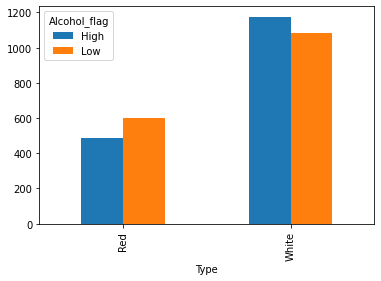

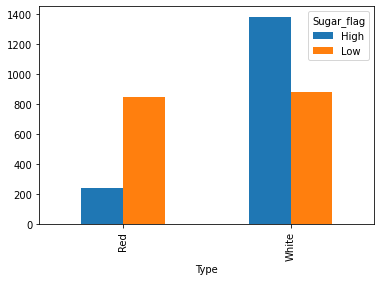

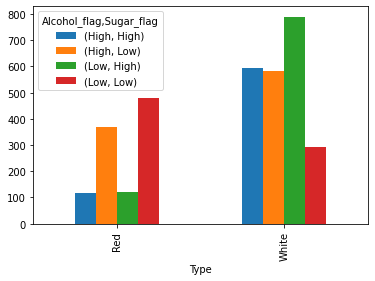

In [54]:
#plotting Alcohol_flag and Type
wineflagDF_C1.plot.bar()
#plotting Sugar_flag and Type
wineflagDF_C2.plot.bar()
#plotting Alcohol_flag, Sugar_flag and Type
wineflagDF_C3.plot.bar()

Use the tables from the previous step to calculate:


# 1.   The prior probability of Type = Red and Type = White.

*Probability_of_red:*
> probability_of_red=(number of rows in red/Total rows)

> probability_of_red=(1085/3345)

> probability_of_red=0.3243

*Probability_of_white:*
> probability_of_white=(number of rows in white/Total rows)

> probability_of_white=(2260/3345)

> probability_of_white=0.6756

# 2.   The probability of high and low alcohol content.

*probability_high_alcohol:*
> probability_high_alcohol=(number of rows in high_alcohol/Total rows)

> probability_high_alcohol=(1661/3345)

> probability_high_alcohol=0.4965

*probability_low_alcohol:*
> probability_low_alcohol=(number of rows in low_alcohol/Total rows)

> probability_low_alcohol=(1684/3345)

> probability_low_alcohol=0.5034

# 3.   The probability of high and low sugar content.

*probability_high_sugar:*
> probability_high_sugar=(number of rows in high_sugar/Total rows)

> probability_high_sugar=(1619/3345)

> probability_high_sugar=0.4840

*probability_low_sugar:*
> probability_low_sugar=(number of rows in low_sugar/Total rows)

> probability_low_sugar=(1726/3345)

> probability_low_sugar=0.5159

# 4.   The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
*probability_alcohol_high_red:*

p(Alcohol_flag = High ∣ Type = Red)= (p(Type = Red | Alcohol_flag = High) * p(Alcohol_flag = High)) / P(Type = Red)

p(Type = Red | Alcohol_flag = High) = 485/1661
p(Alcohol_flag = High) = 1661/3345
P(Type = Red) = 1085/3345

p(Alcohol_flag = High ∣ Type = Red)= ((485/1661) * (1661/3345)) / (1085/3345)

p(Alcohol_flag = High ∣ Type = Red) = 0.4470

*probability_alcohol_low_red:*

p(Alcohol_flag = Low ∣ Type = Red)= (p(Type = Red | Alcohol_flag = Low) * p(Alcohol_flag = Low)) / P(Type = Red)

p(Alcohol_flag = Low ∣ Type = Red) = 600/1684
(Alcohol_flag = Low) = 1684/3345
P(Type = Red) = 1085/3345

p(Alcohol_flag = Low ∣ Type = Red)= ((600/1684) * (1684/3345)) / (1085/3345)

p(Alcohol_flag = Low ∣ Type = Red) = 0.5529


# 5.   The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
*probability_Sugar_high_red:*

p(Sugar_flag = High ∣ Type = Red)= (p(Type = Red | Sugar_flag = High) * p(Sugar_flag = High)) / P(Type = Red)

p(Sugar_flag = High ∣ Type = Red) = 485/1661
p(Alcohol_flag = Low) = 1661/3345
P(Type = Red) = 1085/3345

p(Sugar_flag = High ∣ Type = Red)=((485/1661)*(1661/3345))/(1085/3345) 

p(Sugar_flag = High ∣ Type = Red)= 0.2184

*probability_Sugar_low_red:*

p(Sugar_flag = Low ∣ Type = Red)= (p(Type = Red | Sugar_flag = Low) * p(Sugar_flag = Low)) / P(Type = Red)

p(Sugar_flag = Low ∣ Type = Red) = 237/1619
p(Sugar_flag = Low) = 1619/3345
P(Type = Red) = 1085/3345

p(Sugar_flag = Low ∣ Type = Red)=(237/1619)*(1619/3345)/(1085/3345) 

p(Sugar_flag = Low ∣ Type = Red)= 0.7815



Create NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.


**Create the NB Classifier for training/testing ratios 80-20**

In [55]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineflagDF.iloc[:,1:3]
y = encoded_wineflagDF.iloc[:,0:1]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


## **NB Model Classification Accuracy for training/testing ratios 80-20**

train_80:  0.734304932735426
test_20:  0.7204783258594918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


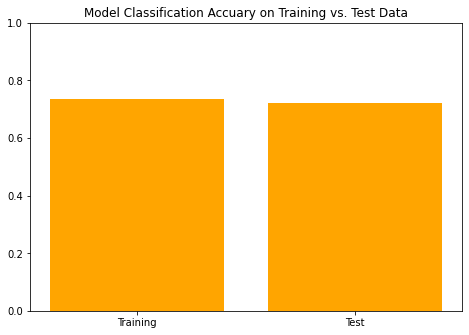

In [56]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
train_80 = NBmodel.score(X_train, y_train)
test_20 = NBmodel.score(X_test, y_test)
scores = [train_80 , test_20]
print('train_80: ',scores[0])
print('test_20: ',scores[1])
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


**Create the NB Classifier for training/testing ratios 75-25**

In [57]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1184             1           0
2433             1           0
2765             0           1
2217             1           1
1555             0           0
...            ...         ...
2017             1           0
3106             0           1
2428             1           0
11               1           1
2343             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2253             1           0
2797             0           0
1005             1           1
3264             0           0
463              1           1
...            ...         ...
540              0           0
855              0           1
1862             1           0
1619             1           0
1719             1           0

[837 rows x 2 columns]


## **NB Model Classification Accuracy for training/testing ratios 75-25**

train_75:  0.7344497607655502
test_25:  0.7228195937873357


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


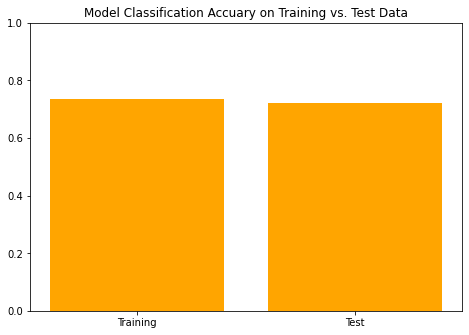

In [58]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
train_75 = NBmodel.score(X_train, y_train)
test_25 = NBmodel.score(X_test, y_test)
scores = [train_75 , test_25]
print('train_75: ',scores[0])
print('test_25: ',scores[1])


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

**Create the NB Classifier for training/testing ratios 70-30**

In [59]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1768             1           0
1792             1           1
413              1           0
1610             1           0
1671             1           0
...            ...         ...
522              1           0
893              1           0
1924             1           1
11               1           1
1868             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1389             0           0
1899             1           0
162              1           1
1889             1           0
2982             0           0
...            ...         ...
941              0           0
3223             0           0
3219             0           1
2221             1           0
205              0           0

[1004 rows x 2 columns]


## **NB Model Classification Accuracy for training/testing ratios 70-30**

train_70:  0.7338744126441692
test_30:  0.7260956175298805


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


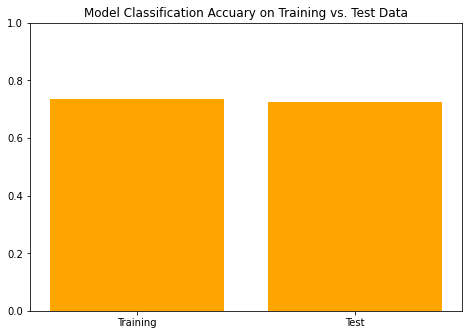

In [60]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
train_70 = NBmodel.score(X_train, y_train)
test_30 = NBmodel.score(X_test, y_test)
scores = [train_70 , test_30]
print('train_70: ',scores[0])
print('test_30: ',scores[1])


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

**Create the NB Classifier for training/testing ratios 60-40**

In [61]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
3188             0           1
1192             1           0
1152             1           1
1741             1           0
1308             1           1
...            ...         ...
3203             0           1
1129             1           1
11               1           1
2226             1           0
2437             0           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1326             0           1
520              1           1
443              0           1
1721             1           1
2826             0           1
...            ...         ...
744              1           0
3184             0           1
1430             0           1
2986             0           0
1062             1           1

[1338 rows x 2 columns]


## **NB Model Classification Accuracy for training/testing ratios 60-40**

train_60:  0.7364225211758844
test_40:  0.7242152466367713


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


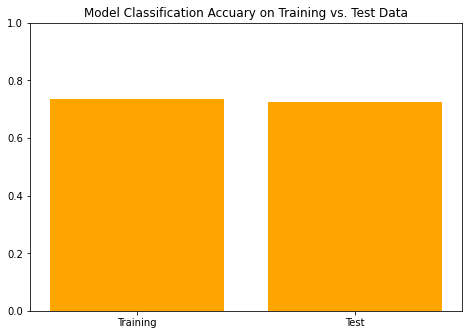

In [62]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
train_60 = NBmodel.score(X_train, y_train)
test_40 = NBmodel.score(X_test, y_test)
scores = [train_60 , test_40]
print('train_60: ',scores[0])
print('test_40: ',scores[1])
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

**Create the NB Classifier for training/testing ratios 50-50**

In [63]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1097             1           1
3003             0           0
1341             0           0
1685             1           0
708              0           0
...            ...         ...
1803             1           1
3297             0           0
1129             1           1
580              0           1
770              1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
348              0           1
1435             0           0
1475             0           0
3212             0           0
1269             1           1
...            ...         ...
2899             0           1
2773             0           1
2584             0           0
1219             1           1
621              0           0

[1673 rows x 2 columns]


## **NB Model Classification Accuracy for training/testing ratios 50-50**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_50:  0.7350478468899522
test_50:  0.7280334728033473


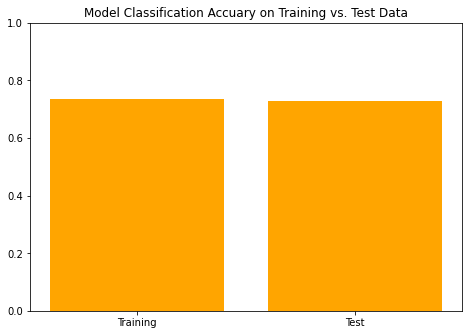

In [64]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
train_50 = NBmodel.score(X_train, y_train)
test_50 = NBmodel.score(X_test, y_test)
scores = [train_50 , test_50]
print('train_50: ',scores[0])
print('test_50: ',scores[1])

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

# Plot the training model accuracy measures

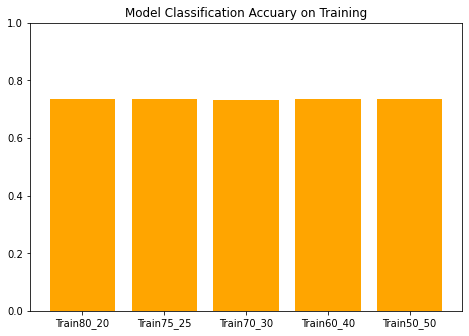

In [65]:
import matplotlib.pyplot as plt

# Train the model 
labels = ["Train80_20", "Train75_25", "Train70_30", "Train60_40", "Train50_50"]
scores = [train_80 , train_75, train_70, train_60, train_50]
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

From the line graph below Naive Bayes accuracy is more for training ratio 60-40 and least for 70-30.

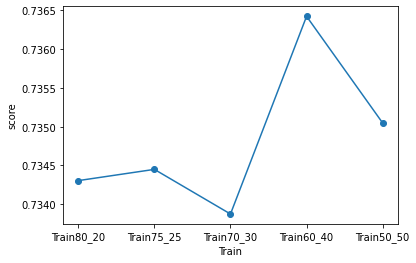

In [66]:
plt.plot(labels,scores,"o-")
plt.xlabel("Train")
plt.ylabel("score")
plt.show()

# Plot the testing model accuracy measures

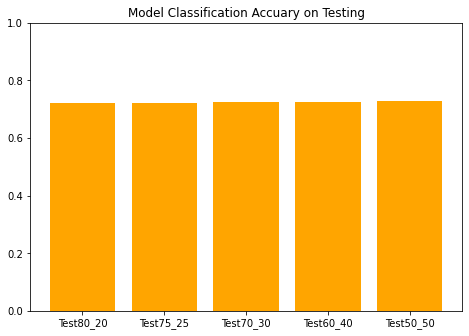

In [67]:
# test the model 
labels = ["Test80_20", "Test75_25", "Test70_30", "Test60_40", "Test50_50"]
scores = [test_20 , test_25, test_30, test_40, test_50]
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Testing')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

From the line graph below Naive Bayes accuracy is more for testing ratio 50-50 and least for the ratio 80-20.

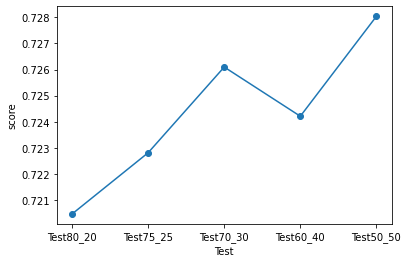

In [68]:
plt.plot(labels,scores,"o-")
plt.xlabel("Test")
plt.ylabel("score")
plt.show()

From the above Naive Baye's classifiers the accuracy on various training/test ratios, 80-20, 75-25, 70-30, 60-40, 50-50 is approximately same.